In [1]:
import numpy
import xgboost as xgb
import pandas as pd
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot
from joblib import dump
from joblib import load
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import graphviz

In [2]:
# load data

data = read_csv('D:/Kuliah/TA/DATAGABUNG4.csv', header=None)
dataset = data.values

# split data into X and y

X = dataset[1:,:-1]
Y = dataset[1:,-1]
Y = Y.astype(str)

print(data.head())

        0          1          2           3
0  Normal  Signature  Dangerous       Jenis
1       3          0          4  Trojan-SMS
2       3          0          5  Trojan-SMS
3       5          2          6    RiskTool
4      11          3         10    RiskTool


In [3]:
#encode string Y as integers

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_Y = label_encoder.transform(Y)
print (label_encoded_Y)
list(label_encoder.inverse_transform([3]))

[6 6 2 ... 0 0 0]


['Trojan']

In [4]:
#split dataset to train and test as 80% 20%
seed = 8
test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_Y, test_size=test_size, random_state=seed)
xgtrain = xgb.DMatrix(X_train, y_train)
xgtest = xgb.DMatrix(X_test , y_test)

In [8]:
# fit model no training data with default parameters
model = XGBClassifier(
            subsample= 0.4, reg_lambda= 2, reg_alpha= 0, n_estimators= 200, min_child_weight= 7, max_depth= 7, learning_rate= 0.1, gamma= 2, colsample_bytree= 0.8
                     )
model.fit(X_train, y_train)
#save model
# dump(model, "D:/Kuliah/TA/TA.joblib.dat")
print(X_test)
# make predictions for test data
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[['4' '0' '7']
 ['6' '0' '4']
 ['2' '0' '0']
 ...
 ['3' '0' '2']
 ['5' '0' '1']
 ['4' '0' '1']]
Accuracy: 74.43%


In [37]:
    import os
#     model = load("D:/Kuliah/TA/TA.joblib.dat")
    gvz = xgb.to_graphviz(model, num_trees=0, rankdir='LR')
    _, file_extension = os.path.splitext('xgboost_test_tree_LR.png')
    format = file_extension.strip('.').lower()
    data = gvz.pipe(format=format)
    full_filename = 'xgboost_test_tree_LR.png'
    with open(full_filename, 'wb') as f:
        f.write(data)

In [5]:
#load model
loaded_model = load("D:/Kuliah/TA/TAlagi.joblib.dat")

C:\Users\Asus\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.preprocessing.label module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Asus\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Asus\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instea

In [6]:
# make predictions for test data
y_pred = loaded_model.predict(X_test) 
predictions = [round(value) for value in y_pred]
print(predictions[0])

5


In [7]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.65%


In [38]:
xgb_clf = XGBClassifier( objective = "multi:softmax")
# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 150, 200, 250, 300],
                 "scale_pos_weight " : [1, 10, 25, 50, 75, 99, 100, 1000]}

# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",cv = 7, verbose = 3, random_state = 40)

# Fit the model
model_xgboost = xgb_rscv.fit(X_train, y_train)


Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV] subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=0.541, total=   3.5s
[CV] subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=0.548, total=   3.5s
[CV] subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s


[CV]  subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=0.553, total=   3.5s
[CV] subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=0.552, total=   3.5s
[CV] subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.2, scale_pos_weight =100, reg_lambda=1.5, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=2, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=0.548, total=   3.5s
[CV] subsample=0.2, scale_pos_weight =100

[CV]  subsample=0.4, scale_pos_weight =75, reg_lambda=4.5, reg_alpha=0.5, n_estimators=150, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=1, colsample_bytree=1.0, score=0.726, total=   6.7s
[CV] subsample=0.4, scale_pos_weight =75, reg_lambda=4.5, reg_alpha=0.5, n_estimators=150, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.4, scale_pos_weight =75, reg_lambda=4.5, reg_alpha=0.5, n_estimators=150, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=1, colsample_bytree=1.0, score=0.721, total=   6.8s
[CV] subsample=0.4, scale_pos_weight =75, reg_lambda=4.5, reg_alpha=0.5, n_estimators=150, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.4, scale_pos_weight =75, reg_lambda=4.5, reg_alpha=0.5, n_estimators=150, min_child_weight=5, max_depth=4, learning_rate=0.1, gamma=1, colsample_bytree=1.0, score=0.732, total=   6.9s
[CV] subsample=0.4, scale_pos_weight =75, reg_

[CV]  subsample=0.2, scale_pos_weight =25, reg_lambda=1, reg_alpha=1, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.001, gamma=1.5, colsample_bytree=0.3, score=0.571, total=   4.4s
[CV] subsample=0.2, scale_pos_weight =25, reg_lambda=1, reg_alpha=1, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.001, gamma=1.5, colsample_bytree=0.3 
[CV]  subsample=0.2, scale_pos_weight =25, reg_lambda=1, reg_alpha=1, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.001, gamma=1.5, colsample_bytree=0.3, score=0.574, total=   4.4s
[CV] subsample=0.2, scale_pos_weight =25, reg_lambda=1, reg_alpha=1, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.001, gamma=1.5, colsample_bytree=0.3 
[CV]  subsample=0.2, scale_pos_weight =25, reg_lambda=1, reg_alpha=1, n_estimators=150, min_child_weight=1, max_depth=7, learning_rate=0.001, gamma=1.5, colsample_bytree=0.3, score=0.574, total=   4.4s
[CV] subsample=0.4, scale_pos_weight =1, reg_l

[CV]  subsample=0.5, scale_pos_weight =10, reg_lambda=1, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, score=0.665, total=   4.8s
[CV] subsample=0.5, scale_pos_weight =10, reg_lambda=1, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6 
[CV]  subsample=0.5, scale_pos_weight =10, reg_lambda=1, reg_alpha=0, n_estimators=150, min_child_weight=7, max_depth=7, learning_rate=0.1, gamma=0.1, colsample_bytree=0.6, score=0.655, total=   4.7s


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  6.7min finished


In [44]:
print("Best: %f using %s" % (xgb_rscv.best_score_, xgb_rscv.best_params_))

Best: 0.733695 using {'subsample': 0.4, 'scale_pos_weight ': 100, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.8}


In [17]:
print(model_xgboost)

RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softmax',
                                           random_state=0, reg_alpha=0,
                                           r...
                                                             1.0],
                                        'gamma': [0.01, 0.1, 0.3, 0.5, 1, 1.5,
                                

In [19]:
# evaluate predictions
from sklearn.metrics import accuracy_score
y_pred = model_xgboost.predict(X_test) 
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.35%


In [22]:
xgb_clf = XGBClassifier( objective = "multi:softmax")
# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 150, 200, 250, 300]}

param_grid = parameters
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_Y)
# Create RandomizedSearchCV Object
# xgb_rscv2 = GridSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",cv = 7, verbose = 3, random_state = 40)

# Fit the model
# model_xgboost2 = xgb_rscv2.fit(X, label_encoded_Y)


KeyboardInterrupt: 

In [23]:
dump(model_xgboost, "D:/Kuliah/TA/TAlagi.joblib.dat")

['D:/Kuliah/TA/TAlagi.joblib.dat']

In [55]:
    parameters = {
               "gamma" : 2,
               "max_depth": 10,
               "min_child_weight": 1
               }
    alg = XGBClassifier()
    cvresult = xgb.cv(parameters, X_train, num_boost_round=300, nfold=5, metrics='auc', early_stopping_rounds=50)
    
    alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

AttributeError: 'numpy.ndarray' object has no attribute 'num_row'

Best: 0.722785 using {'max_depth': 10, 'min_child_weight': 1}
0.642387 (0.007577) with: {'max_depth': 2, 'min_child_weight': 1}
0.642415 (0.007200) with: {'max_depth': 2, 'min_child_weight': 3}
0.642559 (0.007086) with: {'max_depth': 2, 'min_child_weight': 5}
0.642329 (0.007574) with: {'max_depth': 2, 'min_child_weight': 7}
0.694239 (0.006885) with: {'max_depth': 4, 'min_child_weight': 1}
0.694382 (0.006198) with: {'max_depth': 4, 'min_child_weight': 3}
0.691891 (0.007217) with: {'max_depth': 4, 'min_child_weight': 5}
0.695270 (0.007051) with: {'max_depth': 4, 'min_child_weight': 7}
0.720008 (0.009642) with: {'max_depth': 7, 'min_child_weight': 1}
0.719550 (0.009771) with: {'max_depth': 7, 'min_child_weight': 3}
0.718834 (0.009450) with: {'max_depth': 7, 'min_child_weight': 5}
0.717603 (0.009651) with: {'max_depth': 7, 'min_child_weight': 7}
0.722785 (0.008955) with: {'max_depth': 10, 'min_child_weight': 1}
0.722785 (0.008720) with: {'max_depth': 10, 'min_child_weight': 3}
0.722098 (0.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

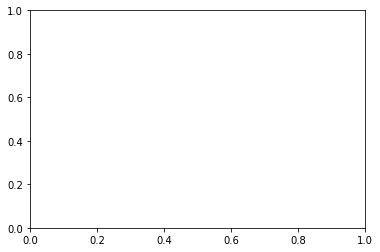

In [34]:
param_test1 = {
 'max_depth':[2, 4, 7, 10],
 'min_child_weight':[1, 3, 5, 7]
}
model = XGBClassifier()
n_estimators = range(50, 450, 50)
param_grid = param_test1
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [49]:
# fit model no training data with default parameters
model = XGBClassifier(
#                         subsample= 0.2,
#                       reg_lambda= 1,
#                       reg_alpha= 0,
#                       n_estimators= 300,
                      min_child_weight= 1,
                      max_depth= 10,
#                       learning_rate= 0.01,
                      gamma= 2,
#                       colsample_bytree= 1.0
                     )
model.fit(X_train, y_train)
#save model
dump(model, "D:/Kuliah/TA/TA.joblib.dat")
print(model)
# make predictions for test data
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy: 73.22%


In [ ]:
param_test1 = {
 "scale_pos_weight " : [1, 10, 25, 50, 75, 99, 100, 1000]
}
model = XGBClassifier()
param_grid = param_test1
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [38]:
param_test1 = {
 "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
    "subsample": [0.2, 0.4, 0.5, 0.6, 0.7]
}
model = XGBClassifier()
param_grid = param_test1
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.673367 using {'colsample_bytree': 1.0, 'subsample': 0.2}
0.628243 (0.005601) with: {'colsample_bytree': 0.3, 'subsample': 0.2}
0.625208 (0.005561) with: {'colsample_bytree': 0.3, 'subsample': 0.4}
0.625780 (0.004796) with: {'colsample_bytree': 0.3, 'subsample': 0.5}
0.626095 (0.005579) with: {'colsample_bytree': 0.3, 'subsample': 0.6}
0.625408 (0.004819) with: {'colsample_bytree': 0.3, 'subsample': 0.7}
0.628243 (0.005601) with: {'colsample_bytree': 0.6, 'subsample': 0.2}
0.625208 (0.005561) with: {'colsample_bytree': 0.6, 'subsample': 0.4}
0.625780 (0.004796) with: {'colsample_bytree': 0.6, 'subsample': 0.5}
0.626095 (0.005579) with: {'colsample_bytree': 0.6, 'subsample': 0.6}
0.625408 (0.004819) with: {'colsample_bytree': 0.6, 'subsample': 0.7}
0.666867 (0.007845) with: {'colsample_bytree': 0.8, 'subsample': 0.2}
0.666237 (0.008329) with: {'colsample_bytree': 0.8, 'subsample': 0.4}
0.665206 (0.008556) with: {'colsample_bytree': 0.8, 'subsample': 0.5}
0.665149 (0.008611) with:

In [43]:
param_test1 = {
    'n_estimators' : [100, 150, 200, 250, 300]
}
model = XGBClassifier()
param_grid = param_test1
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.706322 using {'n_estimators': 300}
0.673596 (0.007438) with: {'n_estimators': 100}
0.681240 (0.007857) with: {'n_estimators': 150}
0.688828 (0.008124) with: {'n_estimators': 200}
0.700882 (0.005746) with: {'n_estimators': 250}
0.706322 (0.008753) with: {'n_estimators': 300}


In [46]:
param_test1 = {
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5]
}
model = XGBClassifier()
param_grid = param_test1
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.673596 using {'reg_alpha': 0, 'reg_lambda': 1}
0.673596 (0.007438) with: {'reg_alpha': 0, 'reg_lambda': 1}
0.673309 (0.007820) with: {'reg_alpha': 0, 'reg_lambda': 1.5}
0.672622 (0.007619) with: {'reg_alpha': 0, 'reg_lambda': 2}
0.673166 (0.007259) with: {'reg_alpha': 0, 'reg_lambda': 3}
0.671047 (0.007326) with: {'reg_alpha': 0, 'reg_lambda': 4.5}
0.673567 (0.007397) with: {'reg_alpha': 0.5, 'reg_lambda': 1}
0.673309 (0.008206) with: {'reg_alpha': 0.5, 'reg_lambda': 1.5}
0.672479 (0.007926) with: {'reg_alpha': 0.5, 'reg_lambda': 2}
0.671878 (0.007736) with: {'reg_alpha': 0.5, 'reg_lambda': 3}
0.671391 (0.006705) with: {'reg_alpha': 0.5, 'reg_lambda': 4.5}
0.672164 (0.007567) with: {'reg_alpha': 1, 'reg_lambda': 1}
0.672393 (0.007164) with: {'reg_alpha': 1, 'reg_lambda': 1.5}
0.673052 (0.007145) with: {'reg_alpha': 1, 'reg_lambda': 2}
0.671964 (0.007653) with: {'reg_alpha': 1, 'reg_lambda': 3}
0.673023 (0.007802) with: {'reg_alpha': 1, 'reg_lambda': 4.5}


In [ ]:
# META CODE
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))

# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(Y)

clf.fit(X, Y)
dump(clf, "D:/Kuliah/TA/TAlagi.joblib.dat")